Epoch 1, Train Loss: 0.660679802171457, Train Accuracy: 84.66666666666667%
Test Loss: 0.26310499757528305, Test Accuracy: 93.4%
Epoch 2, Train Loss: 0.22516209730254944, Train Accuracy: 93.95833333333333%
Test Loss: 0.15549031272530556, Test Accuracy: 95.2%
Epoch 3, Train Loss: 0.15738763612534193, Train Accuracy: 95.56166666666667%
Test Loss: 0.13542891591787337, Test Accuracy: 95.8%
Epoch 4, Train Loss: 0.12433562494381499, Train Accuracy: 96.39166666666667%
Test Loss: 0.1420576237142086, Test Accuracy: 96.0%
Epoch 5, Train Loss: 0.10462137437495056, Train Accuracy: 96.94%
Test Loss: 0.1297376412898302, Test Accuracy: 96.0%


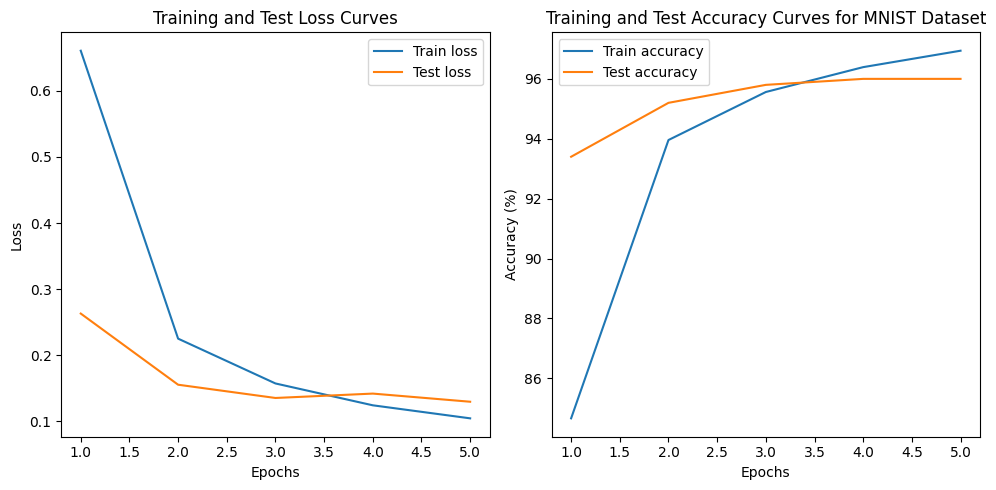

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import random

torch.manual_seed(960)
random.seed(960)
np.random.seed(960)

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Subsetting the data
subset_indices = np.random.choice(len(trainset), 60000, replace=False)
trainloader_subset = torch.utils.data.DataLoader(trainset, batch_size=64, sampler=torch.utils.data.SubsetRandomSampler(subset_indices))

# Load the test data
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

# Subsetting the data
subset_indices = np.random.choice(len(testset), 1000, replace=False)
testloader_subset = torch.utils.data.DataLoader(testset, batch_size=100, sampler=torch.utils.data.SubsetRandomSampler(subset_indices))

# Define model
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # neurons in first layer
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)     # hidden layer
        self.fc4 = nn.Linear(32, 10)      # Output layer

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))  # ReLU activation for hidden layers
        x = torch.sigmoid(self.fc3(x))
        x = self.fc4(x)  # linear function
        return x

model = SimpleMLP()

# loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # learning rate

epoch_count = []
train_loss_values = []
test_loss_values = []
train_accuracy_values = []
test_accuracy_values = []

# Training the model
for epoch in range(5):  # number of epochs
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(trainloader_subset, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(trainloader_subset)
    train_accuracy = 100 * correct_train / total_train
    train_loss_values.append(train_loss)
    train_accuracy_values.append(train_accuracy)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss}, Train Accuracy: {train_accuracy}%")

    # Evaluation on test set
    model.eval()
    test_loss = 0
    correct_test = 0
    total_test = 0
    with torch.no_grad(): 
        for data in testloader_subset:
            images, labels = data
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_loss /= len(testloader_subset)
    test_accuracy = 100 * correct_test / total_test
    test_loss_values.append(test_loss)
    test_accuracy_values.append(test_accuracy)
    print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}%")

    epoch_count.append(epoch+1)

# Plot the loss and accuracy curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and Test Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch_count, train_accuracy_values, label="Train accuracy")
plt.plot(epoch_count, test_accuracy_values, label="Test accuracy")
plt.title("Training and Test Accuracy Curves for MNIST Dataset")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()

plt.tight_layout()
plt.show()


In [100]:
from sklearn.model_selection import train_test_split

num_samples = 1000
num_input_var = 16
num_output_var = 10

# Generate a random sample 
random_sample = torch.rand(num_samples, num_input_var)

# Generate random integers in the range of 0 to 9 for output data
output_data = torch.randint(0, num_output_var, (num_samples,))

# Split the data
x_train, x_test, y_train, y_test = train_test_split(random_sample, output_data, test_size=0.3, random_state=960)

Epoch 1, Train Loss: 2.3327985407624925, Train Accuracy: 8.0%
Test Loss: 2.3017291164398195, Test Accuracy: 9.666666666666666%
Epoch 2, Train Loss: 2.307997520310538, Train Accuracy: 9.857142857142858%
Test Loss: 2.302722447713216, Test Accuracy: 10.666666666666666%
Epoch 3, Train Loss: 2.306034277166639, Train Accuracy: 10.142857142857142%
Test Loss: 2.3027744468053184, Test Accuracy: 10.0%
Epoch 4, Train Loss: 2.304378878048488, Train Accuracy: 10.571428571428571%
Test Loss: 2.3024474708239238, Test Accuracy: 10.666666666666666%
Epoch 5, Train Loss: 2.30269768169948, Train Accuracy: 10.857142857142858%
Test Loss: 2.3021400157610574, Test Accuracy: 10.666666666666666%
Epoch 6, Train Loss: 2.300843451704298, Train Accuracy: 11.285714285714286%
Test Loss: 2.3020661425590516, Test Accuracy: 11.0%
Epoch 7, Train Loss: 2.298755646433149, Train Accuracy: 11.285714285714286%
Test Loss: 2.3020702966054283, Test Accuracy: 10.666666666666666%
Epoch 8, Train Loss: 2.2963064905575346, Train Accur

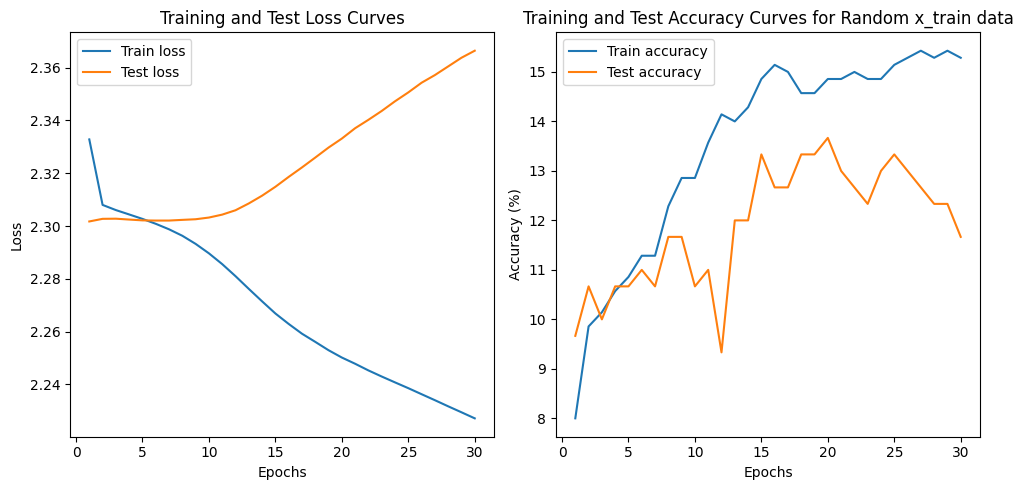

In [109]:


# Define model
class random_model(nn.Module):
    def __init__(self):
        super(random_model, self).__init__()
        self.fc1 = nn.Linear(16, 25)  # neurons in first layer
        self.fc2 = nn.Linear(25, 15)     # hidden layer
        self.fc3 = nn.Linear(15, 10)      # Output layer

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # ReLU activation for hidden layers
        x = self.fc3(x)  # linear function
        return x

model_0 = random_model()

# loss function and optimizer
criterion_0 = nn.CrossEntropyLoss()
optimizer_0 = optim.Adam(model_0.parameters(), lr=0.001)  # learning rate

epoch_count_0 = []
train_loss_values_0 = []
test_loss_values_0 = []
train_accuracy_values_0 = []
test_accuracy_values_0 = []

# Training the model
for epoch in range(30):  # number of epochs
    model_0.train()
    running_loss_0 = 0.0
    correct_train_0 = 0
    total_train_0 = 0
    for data, labels in zip(x_train, y_train):
        optimizer_0.zero_grad()
        outputs_0 = model_0(data.unsqueeze(0))  # Add a dimension for batch size
        loss_0 = criterion_0(outputs_0, torch.tensor([labels]))  # Convert labels to tensor
        loss_0.backward()
        optimizer_0.step()
        running_loss_0 += loss_0.item()

        _, predicted_0 = torch.max(outputs_0.data, 1)
        total_train_0 += 1  # Increment total_train_0 for each sample
        correct_train_0 += (predicted_0 == labels).item()  # Use item() to get integer value from tensor

    train_loss_0 = running_loss_0 / len(y_train)
    train_accuracy_0 = 100 * correct_train_0 / total_train_0
    train_loss_values_0.append(train_loss_0)
    train_accuracy_values_0.append(train_accuracy_0)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss_0}, Train Accuracy: {train_accuracy_0}%")

    # Evaluation on test set
    model_0.eval()
    test_loss_0 = 0
    correct_test_0 = 0
    total_test_0 = 0
    with torch.no_grad(): 
        for data, labels in zip(x_test, y_test):
            outputs_0 = model_0(data.unsqueeze(0))  # Add a dimension for batch size
            loss_0 = criterion_0(outputs_0, torch.tensor([labels]))  # Convert labels to tensor
            test_loss_0 += loss_0.item()
            _, predicted_0 = torch.max(outputs_0.data, 1)
            total_test_0 += 1  # Increment total_test_0 for each sample
            correct_test_0 += (predicted_0 == labels).item()  # Use item() to get integer value from tensor

    test_loss_0 /= len(y_test)
    test_accuracy_0 = 100 * correct_test_0 / total_test_0
    test_loss_values_0.append(test_loss_0)
    test_accuracy_values_0.append(test_accuracy_0)
    print(f"Test Loss: {test_loss_0}, Test Accuracy: {test_accuracy_0}%")

    epoch_count_0.append(epoch+1)

# Plot the loss and accuracy curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epoch_count_0, train_loss_values_0, label="Train loss")
plt.plot(epoch_count_0, test_loss_values_0, label="Test loss")
plt.title("Training and Test Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch_count_0, train_accuracy_values_0, label="Train accuracy")
plt.plot(epoch_count_0, test_accuracy_values_0, label="Test accuracy")
plt.title("Training and Test Accuracy Curves for Random x_train data")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()

plt.tight_layout()
plt.show()
